In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# The Effect of Aging Population on Economy: An Analysis of Singapore From 1983 to 2018.
By Chakrit Thong Ek, Master Of Analytics, Massey University School of Business (Singapore)

*'This essay was written for a module called introductory data analysis.*

*It was my first time writing long codes and working on Jupyter Notebook.*

*In this assignment, I have made the mistake of using camel case formatting.*

*In the future, the mistakes are retained and not changed.'*
-Chakrit

## Abstract 

Aging population may present challenges to many nations around the world, however, the effect of aging population in Singapore remains unanswered. While many studies show that an aging population can increase total dependency ratio of a country, thereby, reducing the proportion of working-age group, the effect of an aging population and its driving factor in Singapore remains debatable. In this study, the effect of an aging population and factors contributing to increase in life expectancy were examined. Our result shows that life expectancy increases as GDP per capita increases, however, life expectancy flattens out when GDP per capita reaches $10,717 per capita. In addition, our results shows an increase in elderly population does not correlate to a reduction in GDP per capita. 

## 1. Introduction

The improvement in healthcare around that world has led to a direct payoff in longer and better lives for millions. However, with a low fertility rate, the world’s population is experiencing a change in population age-structure, leading to an increase in the number and proportion of elderlies in many nations (United Nations, 2019). An increase in the proportion of elderlies in a nation could potentially increase the total dependency ratio of a country, leading to a reduction in the proportion of working-age group. This could present a challenge to the country's economy as the nation's productivity may decrease (Adamis *et al.*, 2014).
<br>
<br>
With the social and health changes since its independence after the separation from Malaysia in 1965, Singapore may be facing a concomitant demographic transition like many nations in the world (Lim *et al*., 2013). In this study, we will find out the demongraphic make up of Singapore, what drives the improvement in life expectancy and the effect of demongraphic shift on Singapore's productivity.

### 1.1. Analysis Questions

1. Demographic makeup of Singapore.
 - What is the changes in life expectancy overtime?
 - What percentage of the population consist of the elderly?
2. What drove the increase in life expectancy?
 - Is there a correlation with the life expectancy and GDP per capita?
 - Is the life expectancy and percentage of household income expenditure on healthcare relative?
3. Effects of demographic transition on economy
 - How relative is the elderly population and the added value per worker?
 - Are there any correlation between life expectancy, elderly population, GDP Per Capita and the productivity of Singapore?
 ****

## 2. Data Sources, Methods, Results and Analysis  

### 2.1. Datasets

The datasets use in this project has been gathered from two sources. The majority of datasets has been taken from [data.gov.sg](https://data.gov.sg/) and while some have been taken from [singstat.gov.sg](https://www.singstat.gov.sg/). Below are the datasets used in this project:

1. [Life Expectancy at Birth and Age 65 years, Annual](https://data.gov.sg/dataset/life-expectancy-by-sex-annual?view_id=06123d4e-31ed-40f0-a4c8-04c164629d22&resource_id=a75832e1-630f-42fc-a1cf-e5c8a0724227) (January 1, 1960 to December 31, 2018)
<br>
2. [Singapore Residents By Age Group, Ethnic Group And Gender, End June, Annual](https://data.gov.sg/dataset/resident-population-by-ethnicity-gender-and-age-group?resource_id=d5d35678-cd15-4f43-b347-d671d1870655) (January 1, 1957 to December 31, 2018)
<br>
3. [Per Capita GNI and Per Capita GDP At Current Prices, Annual](https://data.gov.sg/dataset/per-capita-gni-and-per-capita-gdp-at-current-market-prices-annual) (January 1, 1960 to December 31, 2018)
<br>
4. [Household Healthcare Expenditure](https://data.gov.sg/dataset/household-healthcare-expenditure) (January 1, 2002 to December 31, 2017)
<br>
5. [Value Added Per Worker In Chained (2015) Dollars, By Industry (SSIC 2015), Annual](https://data.gov.sg/dataset/value-added-per-worker-in-chained-2015-dollars-by-industry-ssic-2015-annual)  (January 1, 1983 to December 31, 2019)
<br>

In response to the questions above, data wrangling and exploratory data analysis will be performed to analyze the datasets that were obtained. The following modules will be used throughout this study: Pandas, numpy, seaborn, matplotlib and matplotlib.pyplot.

In [2]:
#Importing necessary python library
import os
import pandas as pd
import numpy as np
from pylab import rcParams
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Setting default styles for pandas dataframe
pd.set_option('display.notebook_repr_html', True)
pd.set_option('max_columns', 20)
pd.set_option('max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format

# Applying default sns theme
sns.set_style('darkgrid')

# Set palette as muted throughout study:
palette = sns.color_palette("muted")

**Exploratory Data Analysis**
<br>
Firstly, the 6 datasets mentioned in section 2.1. was imported into this study. Next, a dataframe containing all 6 datasets was created. Following that, as the time frame that we are interested in, lies from the year 1960 to 2018, irrelevant data were removed. Lastly, missing data were filled with zero for standardization. Further data wrangling were also done in their respective sections.

In summary, these are the steps that was taken initially:
1. Importing of datasets
2. Collating of datasets into a single dataframe
3. Removal of non-relevant data 
4. Changing of data types

In [3]:
#1. Importing file from dataset folder
LifeExpectancyBirthAnd65Years = pd.read_csv('../datasets/life-expectancy-at-birth-and-age-65-years.csv')
DemographicsResidents = pd.read_csv('../datasets/singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv')
PerCapitaPerGDP = pd.read_csv('../datasets/per-capita-gni-and-per-capita-gdp-at-current-prices-annual.csv')
HealthSpending = pd.read_csv('../datasets/household-healthcare-expenditure.csv')
ValueAddedPerWorker = pd.read_csv('../datasets/value-added-per-worker-in-chained-2015-dollars-annual.csv')

In [4]:
# It has a 'period_start' and a 'period_end' instead of year
# Hence, we need to change this format into 'year'
HealthSpending.head()

,period_start,period_end,income_quintile,percentage_expenditure_on_healthcare
0,2002,2003,All Households,4.70
1,2002,2003,1st quintile,5.70
2,2002,2003,2nd quintile,4.80
3,2002,2003,3rd quintile,4.80
4,2002,2003,4th quintile,4.80


In [5]:
# Changing Household healthcare expenditure 'period_start' and 'period_end'
# First, we rename period_start to year
HealthSpending.rename(columns={'period_start':'year'}, inplace=True)

# Next, copy period_end and its corresponding values into a temp dataframe
HealthSpendingEND = HealthSpending[['period_end', 'income_quintile', 'percentage_expenditure_on_healthcare']]

# Delete period_end from healthspending dataframe
HealthSpending.drop(columns={'period_end'}, inplace=True)

# Rename period_end to year
HealthSpendingEND.rename(columns={'period_end':'year'}, inplace=True)

# Merging temp dataframe into main data of health speanding
# We can duplicate the percentage expenditure on healthcare for year 2012:2013, 2017:2018
# This is because we are working percentages, hence, it will not make a difference
HealthSpending = pd.concat([HealthSpending, HealthSpendingEND]).sort_values('year')

In [6]:
# 2. Collating of datasets into a single dataframe

# Establish the common ground by setting 'year' as index
LifeExpectancyBirthAnd65Years = LifeExpectancyBirthAnd65Years.set_index('year')
DemographicsResidents = DemographicsResidents.set_index('year')
PerCapitaPerGDP = PerCapitaPerGDP.set_index('year')
ValueAddedPerWorker = ValueAddedPerWorker.set_index('year')
HealthSpending = HealthSpending.set_index('year')

# Merging of datasets on index'year', with their respective suffix
# Initial data are stored in TempData dataframe, with the completed dataframe stored in DataComplete
TempData = pd.merge(LifeExpectancyBirthAnd65Years, DemographicsResidents, left_on='year', right_index=True, how='outer', suffixes=('_LifeExpectancy', '_Demographic'))
TempData1 = pd.merge(TempData, PerCapitaPerGDP,  left_on='year', right_index=True, how='outer', suffixes=('_Demographic', '_GDPPerCapita')).sort_values('year')
TempData2 = pd.merge(TempData1, ValueAddedPerWorker,  left_on='year', right_index=True, how='outer', suffixes=('_GDPPerCapita', '_Productivity')).sort_values('year')
DataComplete = pd.merge(TempData2, HealthSpending,  left_on='year', right_index=True, how='outer', suffixes=('_Productivity', '_HealthSpending')).set_index('year').sort_values('year')


# 3. Removal data not relevant to study, retain only data from 1960-2018
DataComplete = DataComplete.loc[1960:2018]
DataComplete.head(3)

,level_1_LifeExpectancy,value_LifeExpectancy,level_1_Demographic,level_2,value_Demographic,level_1_GDPPerCapita,value_GDPPerCapita,level_1_Productivity,value_Productivity,income_quintile,percentage_expenditure_on_healthcare
year,,,,,,,,,,,
1960,Total Life Expectancy At Age 65 Years (Residents),8.30,Other Ethnic Groups (Total),45 - 49 Years,1600,Per Capita GDP,"1,310.00",NaN,nan,NaN,nan
1960,Total Life Expectancy At Age 65 Years (Residents),8.30,Total Male Residents,65 - 69 Years,8300,Per Capita GNI,"1,334.00",NaN,nan,NaN,nan
1960,Total Life Expectancy At Age 65 Years (Residents),8.30,Other Ethnic Groups (Total),65 - 69 Years,200,Per Capita GNI,"1,334.00",NaN,nan,NaN,nan


In [7]:
# This confirmed the suspicion that there were large amount of data duplication
# This was solved using .drop_duplicates function (in their respective section)
DataComplete.describe()

,value_LifeExpectancy,value_GDPPerCapita,value_Productivity,percentage_expenditure_on_healthcare
count,"109,560.00","120,120.00","100,320.00","63,360.00"
mean,48.44,"45,321.88","100,975.18",5.16
std,30.71,"25,878.73","20,842.06",0.76
min,8.30,"1,310.00","46,103.84",4.00
25%,19.00,"23,134.00","91,923.40",4.77
50%,42.00,"41,343.00","104,176.51",4.95
75%,80.60,"67,444.00","115,441.11",5.53
max,83.20,"87,108.00","127,929.29",7.80


In [8]:
# 4. Changing of data type

# All columns expect value_Demongraphic column in the DataComplete dataframe has the right type
# value_Demongraphic contains values on the number of residents, hence it should be an int or a float format
# To prevent errors, we will use pd.to_numeric method to change its file type
DataComplete['value_Demographic'] = pd.to_numeric(DataComplete['value_Demographic'], errors='coerce')

# There are NaN and nan throughout the datasets, however, we will retain them for the moment
# This is done so that it can be change what is suited in the analysis

### 2.2.  Demongraphic Makeup of Singapore
<br>
In this section, the trend of life expectancy of Singapore residents from 1960 to 2018 was evaluated. In addition, we analyzed the demographic of Singapore elderly population. This section was divided into two segments, 1) change in life expectancy in Singapore from 1960 to 2018, and 2) changes in the elderly population from 1960 to 2018.

In this study, we will follow the international classification of classifying an elderly person: people age 65 years and older is considered as an elderly (Arthur and Vaupel, 1984).

**2.2.1. Changes in Life Expectancy from 1960 to 2018**
<br>
<br>
Data Selection: The analysis of changes in life expectancy overtime will be carried out by using DataComplete[['level_1_LifeExpectancy','value_LifeExpectancy']].
<br>
<br>
Data description: Refer to Singapore residents (citizens and permanent residents) from 1980. Prior to 1980, figures refer to total population. Data for the latest available year is preliminary.



In [9]:
# Importing of data from DataComplete[['level_1_LifeExpectancy','value_LifeExpectancy']] and storing them into LifeExpectancy dataframe
LifeExpectancy = DataComplete[['level_1_LifeExpectancy','value_LifeExpectancy']]
LifeExpectancy.head()

,level_1_LifeExpectancy,value_LifeExpectancy
year,,
1960,Total Life Expectancy At Age 65 Years (Residents),8.30
1960,Total Life Expectancy At Age 65 Years (Residents),8.30
1960,Total Life Expectancy At Age 65 Years (Residents),8.30
1960,Total Life Expectancy At Age 65 Years (Residents),8.30
1960,Total Life Expectancy At Age 65 Years (Residents),8.30


**2.2.1.1. Data Wrangling and Exploratory Data Analysis**
<br>
Due to the merging of datasets, there are a huge amount of duplicated data. The steps that were taken in data wrangling are listed below:
<br> 
1. Removal of duplicated data from dataframe
2. Rename column 'level_1_LifeExpectancy' as 'Total_Life_Expectancy'.
3. Rename 'Total Life Expectancy At Birth (Residents)' as 'Life Expectancy At Birth'.
4. Rename 'Total Life Expectancy At Age 65 Years (Residents)' as 'Life Expectancy At Age 65 Years'.
5. Append a column called 'RateOfChange' and calculate the rate of change between the years for Life Expectancy At Birth.
6. Append a column called 'RateOfChange' and calculate the rate of change between the years for Life Expectancy At 65 Years.
7. Merge Life Expectancy At Birth and Life Expectancy At 65 Years on index='Year'.

In [10]:
# 1. Removal of duplicated data from dataframe

# First Check for duplicated rows
LifeExpectancy.duplicated().sum()
# Output returns as: 67240 duplicated rows

# We want to drop the duplicated rows instead of the first duplicate
# We reset index as we want to include 'year' as a unique identifier
LifeExpectancy = LifeExpectancy.reset_index()
LifeExpectancy = LifeExpectancy.drop_duplicates(keep='first')

# Now there are NANs, in years are not present in the original datafile
# Remove rows containing NaNs
LifeExpectancy = LifeExpectancy.dropna()
# Set year as index
LifeExpectancy = LifeExpectancy.set_index('year').sort_values('year')
LifeExpectancy.info()
# 86 rows remains, data contains no more error

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 1960 to 2018
Data columns (total 2 columns):
level_1_LifeExpectancy    86 non-null object
value_LifeExpectancy      86 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [11]:
# 2. Rename column 'level_1_LifeExpectancy' to 'Total_Life_Expectancy'.
LifeExpectancy.rename(columns= {'level_1_LifeExpectancy' : 'Total_Life_Expectancy'}, inplace=True)

# 3. Rename 'Total Life Expectancy At Birth (Residents)' to 'AtBirth(Residents)'.
# 4. Rename 'Total Life Expectancy At Age 65 Years (Residents)' to 'AtAge65Years(Residents)'.
# Running the code below will apply to both data of strings
LifeExpectancy['Total_Life_Expectancy'] = LifeExpectancy['Total_Life_Expectancy'].str.replace('Total Life Expectancy', '')
LifeExpectancy['Total_Life_Expectancy'] = LifeExpectancy['Total_Life_Expectancy'].str.replace(' ', '')
LifeExpectancy.head()

,Total_Life_Expectancy,value_LifeExpectancy
year,,
1960,AtAge65Years(Residents),8.30
1960,AtBirth(Residents),62.90
1965,AtBirth(Residents),64.50
1965,AtAge65Years(Residents),8.30
1970,AtAge65Years(Residents),8.40


In [12]:
# 5. Calculating the RateOfChange for 'At Birth (Residents)'
# Filtering for 'Birth(Residents)'
LifeExpectancyBirth = LifeExpectancy[LifeExpectancy['Total_Life_Expectancy'] == 'AtBirth(Residents)'].copy()

# Storing value of LifeExpectancyBirth['value'] into a temporary file
TempRateBirth = LifeExpectancyBirth['value_LifeExpectancy'].copy()

# Calculating the percentage of change
TempRateBirth_1 = TempRateBirth.pct_change()*100

# Changing Change_percet file format from pd.Series to pd.Dataframe, so as to enable merging with LifeExpectancyBirth
TempRateBirth_1 = TempRateBirth_1.to_frame().reset_index()

# Setting 'Year' as index and renaming 'value' to 'RateOfChange'
TempRateBirth_2 = TempRateBirth_1.set_index('year')
TempRateBirth_2.rename(columns = {'value_LifeExpectancy' : 'RateOfChangeLifeExpectancyBirth(%)'}, inplace = True)

# Appending TempRateBirth_2 into LifeExpectancyBirth
LifeExpectancyBirth = pd.merge(LifeExpectancyBirth, TempRateBirth_2, left_on='year', right_index=True, how='outer')
LifeExpectancyBirth.tail()

,Total_Life_Expectancy,value_LifeExpectancy,RateOfChangeLifeExpectancyBirth(%)
year,,,
2014,AtBirth(Residents),82.60,0.24
2015,AtBirth(Residents),82.90,0.36
2016,AtBirth(Residents),83.00,0.12
2017,AtBirth(Residents),83.20,0.24
2018,AtBirth(Residents),83.20,0.00


In [13]:
# 6. Calculating the RateOfChange for '65Years(Residents)'
# Filtering for 'Birth(Residents)'
LifeExpectancy65Years = LifeExpectancy[LifeExpectancy['Total_Life_Expectancy'] == 'AtAge65Years(Residents)'].copy()

# Storing value of LifeExpectancy65Years['value'] into a temporary file
TempRate65Years = LifeExpectancy65Years['value_LifeExpectancy'].copy()

# Calculating the percentage of change
TempRate65Years_1 = TempRate65Years.pct_change()*100

# Changing Change_percet file format from pd.Series to pd.Dataframe, so as to enable merging with LifeExpectancyBirth
TempRate65Years_1 = TempRate65Years_1.to_frame().reset_index()

# Setting 'Year' as index and renaming 'value' to 'RateOfChange'
TempRate65Years_2 = TempRate65Years_1.set_index('year')
TempRate65Years_2.rename(columns = {'value_LifeExpectancy' : 'RateOfChangeLifeExpectancy65Years(%)'}, inplace = True)

# Appending TempRate65Years_2 into LifeExpectancy65Years
LifeExpectancy65Years = pd.merge(LifeExpectancy65Years, TempRate65Years_2, left_on='year', right_index=True, how='outer')
LifeExpectancy65Years.head()

,Total_Life_Expectancy,value_LifeExpectancy,RateOfChangeLifeExpectancy65Years(%)
year,,,
1960,AtAge65Years(Residents),8.30,nan
1965,AtAge65Years(Residents),8.30,0.00
1970,AtAge65Years(Residents),8.40,1.20
1975,AtAge65Years(Residents),8.50,1.19
1980,AtAge65Years(Residents),14.00,64.71


The 'RateOfChange(%)' for the year 1960 is nan as there were no values before 1960. The nan will be filled with 0 as the increase is 0%.

In [14]:
# Fill nan with 0
# Reset index as we want to use 'year' for plotting 
LifeExpectancyBirth = LifeExpectancyBirth.fillna(0)
LifeExpectancyBirth = LifeExpectancyBirth.reset_index()
LifeExpectancy65Years = LifeExpectancy65Years.fillna(0)
LifeExpectancy65Years = LifeExpectancy65Years.reset_index()

**2.2.1.2. Visualization and Analysis**
1. Subplotting graph of life expectancy at birth and at age 65 years
2. Plotting the growth rate of life expectancies

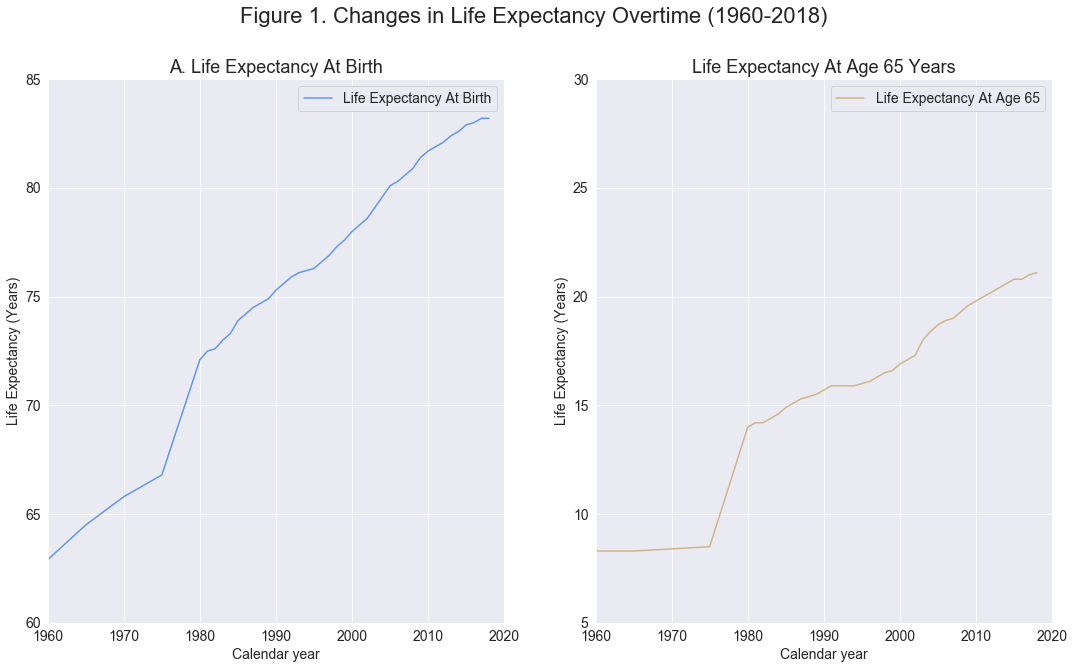

In [15]:
# Subplotting of Life Expectancy At Birth and Life Expectancy At Age 65 Years

fig = plt.figure(figsize=(18,10))

# Plotting Figure 1 containing Life Expectancy At Birth
fig.suptitle('Figure 1. Changes in Life Expectancy Overtime (1960-2018)', fontsize=22)
ax1 = fig.add_subplot(121)

ax = sns.lineplot(x='year', y='value_LifeExpectancy', data=LifeExpectancyBirth, ax=ax1, label='Life Expectancy At Birth', color='cornflowerblue')
ax.set_title('A. Life Expectancy At Birth', fontsize=18)
ax.set_ylabel('Life Expectancy (Years)', fontsize=14)
ax.set_xlabel('Calendar year', fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)

# Range of axis is set at (x_min=1960, x_max=2020, y_min=60, y_max=85)
# Difference between y-axis min and maximum is 25
plt.axis([1960,2020,60,85])
plt.legend(fontsize=14)

# Plotting Figure 2 containing Life Expectancy At Age 65 Years
ax2 = fig.add_subplot(122)
# Set colour of line to green
ax = sns.lineplot(x='year', y='value_LifeExpectancy',data=LifeExpectancy65Years, ax=ax2 ,label='Life Expectancy At Age 65', color='tan')
ax.set_title('Life Expectancy At Age 65 Years', fontsize=18)
ax.set_ylabel('Life Expectancy (Years)', fontsize=14)
ax.set_xlabel('Calendar year', fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)

# Range of axis is set at (x_min=1960, x_max=2020, y_min=5, y_max=30)
# Difference between y-axis min and maximum is 25
plt.axis([1960,2020,5,30])
plt.legend(fontsize=14)


plt.show()

**Analysis of Figure 1**
<br>
- The trend of life expectancy at birth and at age 65 years have increased from 1960 to 2018.
- There was a sharp increase in both life expectancies from 1975 to 1980.
- Following the sharp increase in 1975-1980, life expectancies follow a gradual increase.
- From 1960-1975, life expectancy saw no increase, this could mean that medical intervention was not advance for reducing mortalities of the elderly after age 65 years old.
- There must be a major change in factors such as economy, lifestyle, society (safety), healthcare or medical care, to cause a sudden increase in life expectancy from 1975-1980.
- Throughout 1960 to 2018, the increase in the value of life expectancy at birth was much greater compared to the life expectancy at age 65.
- The increase in life expectancy at birth is relative to the increase in life expectancy at age 65 years.


Although the increase of life expectancy at birth is greater than the increase of life expectancy at age 65 years, however, to find the trend of life expectancy, their rate of change must be considered. The bar graph consisting of the mean rate of change of life expectancies between 1960 to 2018 was be plotted.

**Problem with getting the mean value of growth rate of Life Expectancy on Bar Graph**
- The intervals for 'year' changes from a 5 year interval from 1960-1980 to a 1 year interval from 1980-2018. 
- The 'year' column has missing years: 1961-1964, 1966-1969, 1971-1974 and 1976-1979.
- Missing years was added-in before mean growth rate was calculated. Further data wrangling was done below.


In [16]:
# Adding the missing years(1961-1964, 1966-1969, 1971-1974 and 1976-1979) in to the dataframe.
# First, create a dataframe containing these values
MissingYearsDict = {'year':[1961,1962,1963,1964,1966,1967,1968,1969,1971,1972,1973,1974,1976,1977,1978,1979,]}
MissingYeardf = pd.DataFrame(MissingYearsDict)
MissingYeardf1 = pd.DataFrame(MissingYearsDict)
# Next, for all the 'year', make a new column and insert 0 as data
MissingYeardf['RateOfChangeLifeExpectancyBirth(%)'] = '0'
MissingYeardf['RateOfChangeLifeExpectancy65Years(%)'] = '0'
MissingYeardf.set_index('year', inplace=True)
MissingYeardf.head(2)

# Set year as index for appending of data
LifeExpectancy65YearsRate = LifeExpectancy65Years.set_index('year')
LifeExpectancyBirthRate = LifeExpectancyBirth.set_index('year')

# Concat data into dataframe called ROChangeAllYear
# But only keeping data with RateofChange
ROChange = pd.concat([LifeExpectancyBirthRate, LifeExpectancy65YearsRate], axis=1, sort=True)
ROChange = ROChange.drop(columns={'Total_Life_Expectancy', 'value_LifeExpectancy'})

# Finally append MissingYeardf into LifeExpectancy65Years and LifeExpectancyBirth then, sort index 
ROChangeAllYear = pd.concat([ROChange, MissingYeardf], axis=0, sort=True)
ROChangeAllYear

# After the append of MissingYeardf into dataframes, data type became object for all columns
# Hence, we need to change data type of data into 'float64'
ROChangeAllYear = ROChangeAllYear[['RateOfChangeLifeExpectancyBirth(%)', 'RateOfChangeLifeExpectancy65Years(%)']].astype('float64')
ROChangeAllYear = ROChangeAllYear.fillna(0).sort_index()

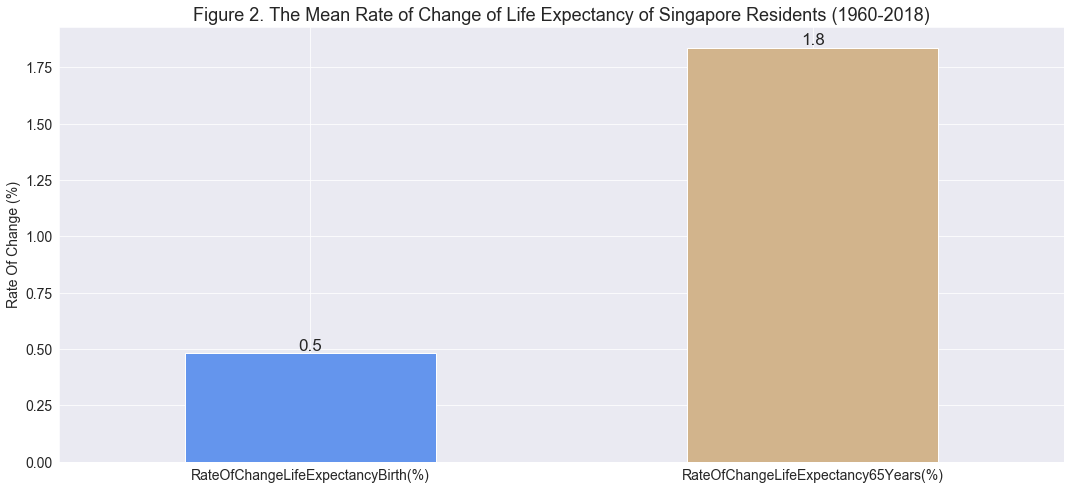

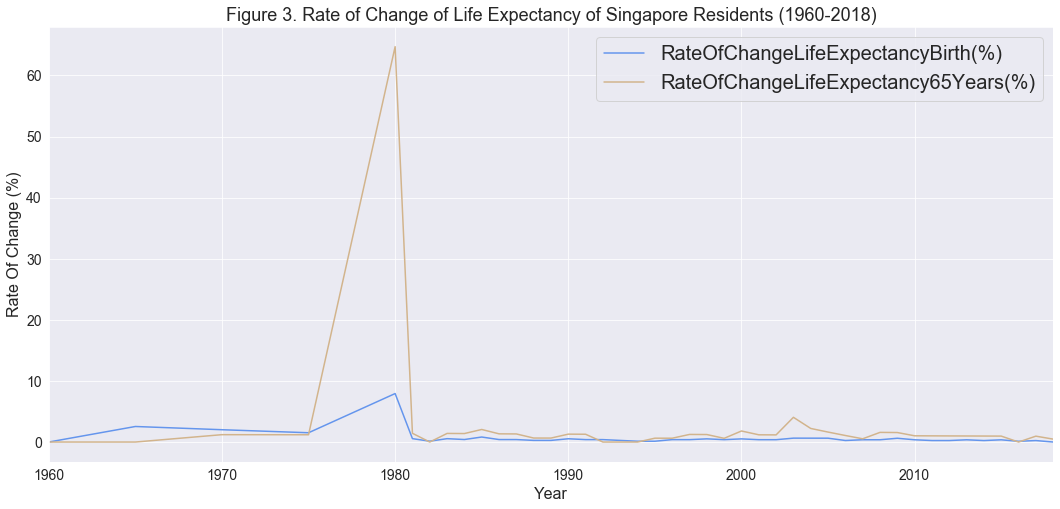

In [17]:
# Plotting Figure 2 and 3
# Setting figure size of graph
rcParams['figure.figsize'] = 18, 8

# Plotting Figure 2. 
# Figure 3 demonstrates the mean rate of change as a bar graph 
ax1 = ROChangeAllYear.loc[:,:].mean().plot(kind='bar', color=['cornflowerblue', 'tan'])
plt.title('Figure 2. The Mean Rate of Change of Life Expectancy of Singapore Residents (1960-2018)', fontsize=18)
plt.ylabel('Rate Of Change (%)', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)

# Plotting Figure 3
# Figure 4 demonstrates the mean rate of change as a multi-lined graph
# For Figure 4, ROChange will be used to plot line graph. This will generate a more linear graph compared to using ROChangeAllYear
ax2 = ROChange.plot(kind='line', color=['cornflowerblue', 'tan'])
plt.title('Figure 3. Rate of Change of Life Expectancy of Singapore Residents (1960-2018)', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Rate Of Change (%)', fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.legend(prop={"size":20})

# A function that adds the value label to graphs
# Reference to code is shown in Section 5 called 'References'.
def add_value_labels(ax, spacing=0):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,                      # Vertically align label differently for
        fontsize=17)                     
                                        # positive and negative values.


# Adding value labels
add_value_labels(ax1)

plt.show()

**2.2.1.3. Analysis, Results and Discussion on Figure 2 and 3**
- The mean rate of change of life expectancy at age 65 years is 3.5 times higher than the mean rate of change of life expectancy at birth (Figure 2).
- From 1975 to 1980, there was a sharp increase in life expectancy at age 65 years (Figure 3), with a value of approximately 64%.
- Similarly, between 1975 to 1980, life expectancy at birth (Figure 3) increased by 7.9%.
- From 1980 to 2018, the rate of change for life expectancy at birth were modest, while, the rate of change at age 65 years to fluctuated.
- In 2003, a sharp increase in life expectancy at age 65 is seen(Figure 3).
- Life expectancy at birth was 66.8, 72, and 83.2 years in the years 1975, 1980 and 2018 respectively (Figure 1).
- The highest increase in life expectancy at birth happened between 1975 and 1980.
- Life expectancy for residents at age 65 years was 8.5, 14 and 21.10 years in the year 1975, 1980 and 2018 respectively(Figure 2).
- The highest increase in life expectancy at age 65 happened between 1975 and 1980.
- Life expectancy at birth has a mean increase of 0.5% throughout 1960 to 2018 (Figure 3).
- Life expectancy at age 65 has a mean increase of 1.8% throughout 1960 to 2018 (Figure 3).
- There was 0% increase in life expectancy at birth in 2018.

With a mean increase of 0.5% yearly and a spike increase in 1980, the growth rate for life expectancy at birth is slowing down (Figures 2 and 3). This means that after 2018, the growth rate for life expectancy at birth will be low. Similarly, the increase in life expectancy at age 65 years will slow down as well. This observation is supported by Foreman et al. (2018) and his team, who stated that by 2040, the forecast of life expectancy in Singapore will hit approximately 85 years.  
After 2018, the life expectancy for Singapore Residents will continue to increase at an extremely small margin. This is due to the fact that we are reaching the limit of human age. Life expectancy is unlikely to go beyond 95 years unless there is a fundamental change in our ability to delay the aging process (Crimmins, 2015).
The increase in Life Expectancy from 1975-1980 was the greatest. There was an increase of 7.93% in life expectancy at birth and 64.7% in life expectancy at age 65 years. Between that period, Singapore might have experienced major changes to their socioeconomic status or healthcare resources leading to a sharp increase in life expectancy. Before we take a look at the socioeconomic or healthcare resource changes over time, we will look at the changes in Singapore's demographic.


**2.2.2.  Changes in percentage of elderly population in Singapore (1960 to 2018)**
<br>

In Singapore, a person who is 65 years or older is classified as an elderly. In this section, we will analyze the change in the percentage of the elderly population against the total population from 1960 to 2018. The analysis of this percentage signifies population ageing due to declining fertility rates and rising life expectancy. The changes in the percentage of elderly population can give us insights into raising new demographic challenges such as an increase in the total dependency population and a shrinking labor force. 

Data Selection: The data which will be used in this section will be taken from DataComplete[['level_1_Demographic','level_2', 'value_Demographic']].

Data description: 
1. Data for 1970 and from 1980 onwards refer to Singapore residents (citizens and permanent residents).
2. Data prior to 1980 (except 1970) refer to total population.
3. Data for 1970 and 1980 refer to all residents present in Singapore on Census day.
4. Data from 2000 onwards are based on the register-based approach.
5. Data from 2003 onwards exclude residents who are overseas for a continuous period of 12 months or longer as at the reference period.

In [18]:
# Importing of demographic data into a new dataframe called demographic
Demographic = DataComplete[['level_1_Demographic','level_2', 'value_Demographic']]

Demographic.duplicated().sum()
Demographic.isnull().sum()
# There are a total of 50989 rows of dupicated data
# There are a total of 6240 nan in value_Demographic column

level_1_Demographic       0
level_2                   0
value_Demographic      6240
dtype: int64

**2.2.2.1. Data Wrangling and Exploratory Data Analysis**
<br>
Before the visualization of demographic data can be done, data wrangling must be performed. These are the steps that was taken in this section:
<br> 
1. Removal of duplicated data from the dataframe.
2. Select total residents and disregard ethnicity and sex, next set this data into Demographic_Residents dataframe.
3. Reshaping age groups.
4. Create a new dataframe to store, population total and percentage of elderly per year.


In [19]:
# 1. Removal of duplicated data from dataframe

# Delete subsequent duplicated rows while keeping the first
# Reset index to include 'year' as a unique identifier
Demographic = Demographic.reset_index()
Demographic = Demographic.drop_duplicates(keep='first') #19470 rows remained

# 2. Select total residents and set data in to Demographic_Residents
Demographic_Residents = Demographic[Demographic['level_1_Demographic'] == 'Total Residents']

In [20]:
# 3. We will consolidate all elderly into '65 Years & Over' group
# Redundant rows containing '65 - 69 Years','70 - 74 Years','75 - 79 Years','80 - 84 Years',
# '70 Years & Over','75 Years & Over', '80 Years & Over', '85 Years & Over' are removed
# Collect index containing these conditions
indexNames = Demographic_Residents[(Demographic_Residents.level_2 == '65 - 69 Years')|(Demographic_Residents.level_2 == '70 - 74 Years')
                                  |(Demographic_Residents.level_2 == '70 Years & Over')|(Demographic_Residents.level_2 == '75 - 79 Years')
                                  |(Demographic_Residents.level_2 == '75 Years & Over')|(Demographic_Residents.level_2 == '80 - 84 Years')
                                  |(Demographic_Residents.level_2 == '80 Years & Over')|(Demographic_Residents.level_2 == '85 Years & Over')].index

# Removing index containing the above condition from data
Demographic_Residents = Demographic_Residents.drop(indexNames)

# Set'year' as index, delete level_1_Demographic column and rename level_2 as Demographic
Demographic_Residents = Demographic_Residents.set_index('year').drop(columns={'level_1_Demographic'}).rename(columns={'level_2' : 'Demographic'})
Demographic_Residents.isnull().sum()

# There is no missing data

Demographic          0
value_Demographic    0
dtype: int64

In [21]:
# 4. Creation of new dataframe to store total popluation, elderly population and change in elderly population.

# Total population
PopulationTotal = Demographic_Residents.groupby('year').sum()
PopulationTotal.rename(columns={'value_Demographic': 'Total Population'}, inplace=True)

# Elderly population and adding a change in percentage column
ElderlyTemp = Demographic_Residents[Demographic_Residents['Demographic']=='65 Years & Over']

# Set Change_Elderly_Percentage_Yearly to reflect elderly population divided by total population
ElderlyTemp.insert(2, 'Percentage_(Elderly/TotalPopulation)', (ElderlyTemp['value_Demographic']/PopulationTotal['Total Population']*100), True)

# Delete column='Demographic' and rename column='value_Demographic' as 'Elderly_Population'
ElderlyPopulation = ElderlyTemp.drop(columns={'Demographic'})
ElderlyPopulation.rename(columns={'value_Demographic':'Elderly_Population'}, inplace=True)

# Calculating the total increase in elderly population for the period 1960-2018
ElderlyIncreaseTotal = ElderlyPopulation.loc[(1960, 2018), :].pct_change()*100
ElderlyIncreaseTotal.drop(columns={'Percentage_(Elderly/TotalPopulation)'}, inplace=True)
ElderlyIncreaseTotal.rename(columns={'Elderly_Population':'Percentage increase'}, inplace=True)

ElderlyPopulation.head(2)

,Elderly_Population,Percentage_(Elderly/TotalPopulation)
year,,
1960,"37,500.00",2.28
1961,"38,800.00",2.28


**2.2.2.2. Visualization and Analysis**
1. Area graph of changes in elderly population (1960-2018)

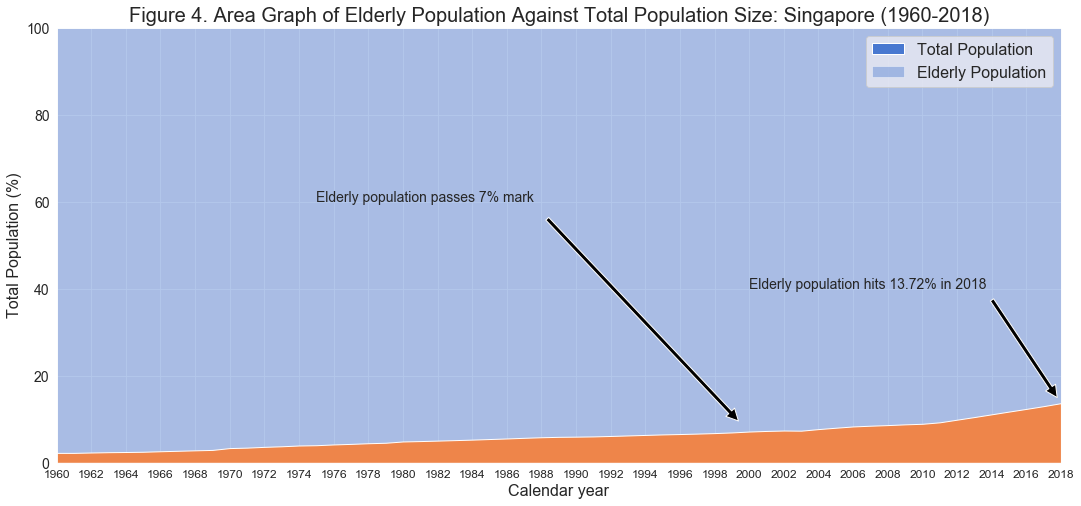

In [22]:
# Area graph of changes in elderly population (1960-2018)
sns.set_palette("muted")

# Setting figure size
fig = plt.figure(figsize=(18,8))

x = ElderlyPopulation.index
y = ElderlyPopulation['Percentage_(Elderly/TotalPopulation)']
y1 = PopulationTotal['Total Population']/PopulationTotal['Total Population']*100

# Setting x and y and colour of area graph 
# Making manual stackplot
plt.stackplot(y, y1)

# Fill 100% with Total population
plt.fill_between(x, y1, alpha=0.4)

# Fill area of elderly population
plt.fill_between(x, y)

# Setting of title, labels and ticks
plt.title('Figure 4. Area Graph of Elderly Population Against Total Population Size: Singapore (1960-2018)', fontsize=20)
plt.ylabel('Total Population (%)', fontsize=16)
plt.xlabel('Calendar year', fontsize=16)
plt.xticks(np.arange(1960,2020, 2), fontsize=12)
plt.yticks(fontsize=14)
plt.legend(['Total Population','Elderly Population'], fontsize=16)
plt.axis([1960,2018,0,100])

# Annotating elderly population percentage in year 2018
plt.annotate('Elderly population hits 13.72% in 2018', xy=(2018,13.72), xytext=(2000, 40),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)

plt.annotate('Elderly population passes 7% mark', xy=(2000,7), xytext=(1975, 60),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)

plt.show()

**2.2.2.3. Analysis, Results and Discussion of Figure 4**
- There was a steady increase in the elderly population during the period 1960-2018.
- Elderly population passes the 7% mark between the period 1999-2000.
- In 2011, the growth rate of elderly population increase, this can be seen by the increase in gradient in Figure 4.
- In 2018, 13.72% of Singapore population was made up of the elderly.
- The elderly population have increased from 2.28% in 1960 to 13.72% in 2018.
- Elderly numbers increased by 1360.94% from 37,500 in 1960 to 547,854 in 2018.

The elderly population in Singapore has been steadily raising since the 1960. Between the year 1999 and the year 2000, Singapore's elderly population passed the 7% mark. This shifted Singapore's demographic transition to an ageing population. The number of elderly in Singapore continued to raise steadily until 2011, where the number of elderlies increased by a large amount. This can be seen by the increase in gradient of Figure 4 in the year 2011. In summary, there was a large amount of increase in elderly population in Singapore. Initially the population consisted of 2.28% of elderly, however in 2018, the percentage of elderly in the population increased to 13.72%. This increase in percentage amount to a total increase of 1360.94% in the number of elderlies from 1960 to 2018. In the next section, the contributing factor leading to this demographic shift was explored.

### 2.3. What drove the improvement in life expectancy?
In this section, we will find out whether Gross Domestic Product Per Capita has any correlation with life expectancy at Birth. In addition, we will examine any correlation between household income expenditure on healthcare relative with life expectancy (at birth). This section has been divided into two segment, 1) life expectancy and GDP Per Capita and 2) life expectancy and household expenditure on healthcare.

**2.3.1. Life Expectancy and GDP Per Capita**

Data Selection: The analysis of Life Expectancy and GDP Per Capita will be done using the dataset LifeExpectancyBirth (from section 2.2.1. Changes in Life Expectancy Overtime) and DataComplete[['level_1_GDPPerCapita','value_GDPPerCapita']].

Data description: Gross National Income and Gross Domestic Product divided by midyear population, expressed in current prices.

In [23]:
# Storing DataComplete[['level_1_GDPPerCapita','value_GDPPerCapita']] into a new dataframe called GDPPerCapita
GDPPerCapita = DataComplete[['level_1_GDPPerCapita','value_GDPPerCapita']]

# Checking for duplicated data
GDPPerCapita.duplicated().sum()

# Checking for nulls
GDPPerCapita.isnull().sum()
# There are a total of 67202 rows of dupicated data
# There are a total of 0 nan in value_Demographic column

level_1_GDPPerCapita    0
value_GDPPerCapita      0
dtype: int64

**2.3.1.1. Data Wrangling Exploratory Data Analysis**
<br>
Before the visualization of demographic data can be done, data wrangling on GDPPerCapita will be done. These are the steps that will be taken on  dataset:

1. Removal of GNI Per Capita data
- Removal of duplicated data
- Removal of level_1 columns
- Removal of irrelevant data from LifeExpectancyBirth dataset
- Removal of the years 1961-1964, 1971-1974 and 1976-1979


In [24]:
# 1. Removal of GNI Per Capita from dataframe
# Selecting only data relevant to GDP Per Capita
GDPPerCapita = GDPPerCapita[GDPPerCapita['level_1_GDPPerCapita']=='Per Capita GDP']

# 2. Removal of duplicated data
# Delete subsequent duplicated rows while keeping the first
# Reset index to include 'year' as a unique identifier
GDPPerCapita = GDPPerCapita.drop_duplicates(keep='first') # 59 rows remained
GDPPerCapita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1960 to 2018
Data columns (total 2 columns):
level_1_GDPPerCapita    59 non-null object
value_GDPPerCapita      59 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [25]:
# 3. Removal of irrelevant data from LifexExpectancyBirth
# Standardizing index to year
LifeExpectancyGDP = LifeExpectancyBirth.drop(columns={'Total_Life_Expectancy', 'RateOfChangeLifeExpectancyBirth(%)'}).set_index('year')

# 4. Removal of the years 1961-1964, 1971-1974 and 1976-1979 by merging inner.
# In order to construct a scatterplot, the input array dimensions  must match exactly.
# As LifeExpectancyBirth dataset does not have data recorded for these years 1961-1964, 1971-1974 and 1976-1979.
# These years will be removed from GDPPerCapita by merging inner.
# Adding or tailoring of data for these years will provide inaccurate analysis
GDPPerCapitatemp = GDPPerCapita.drop(columns={'level_1_GDPPerCapita'})
LifeGDP = pd.merge(GDPPerCapitatemp, LifeExpectancyGDP, left_on='year', right_index=True, how='inner')
LifeGDP.head()

,value_GDPPerCapita,value_LifeExpectancy
year,,
1960,"1,310.00",62.90
1965,"1,581.00",64.50
1970,"2,834.00",65.80
1975,"6,068.00",66.80
1980,"10,717.00",72.10


**2.3.1.2. Visualization and Analysis**
1. Scatter plot Life Expectancy against GDP Per Capita.

C:\Users\chaka\Anaconda3\lib\site-packages\seaborn\regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


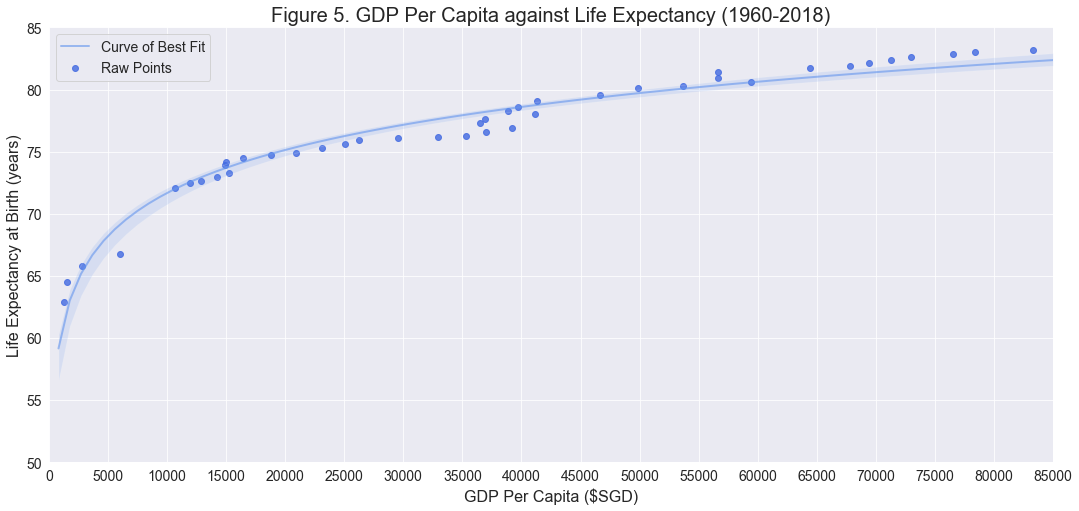

In [26]:
# 1. Scatter plot Life Expectancy against GDP Per Capita.

# Defining X and Y
# GDP Per Capita is plotted on x-axis
x = LifeGDP['value_GDPPerCapita']

# Life expectancy at birth will be plotted on y-axis
y = LifeGDP['value_LifeExpectancy']

# Setting the title
plt.title('Figure 5. GDP Per Capita against Life Expectancy (1960-2018)', fontsize=20)

# Using the fuction regplot to make a scatterplot
# A curved line of best fit has been drawn using logx=True
ax = sns.regplot(x, y, logx=True, 
                scatter_kws={"color": "royalblue"}, line_kws={"color": "cornflowerblue", "alpha":0.6, 'lw':2})

# Setting lables, legends and ticks
plt.xlabel('GDP Per Capita ($SGD)', fontsize=16)
plt.ylabel('Life Expectancy at Birth (years)', fontsize=16)
plt.axis([0, 85000,50, 85 ])
plt.xticks(np.arange(0,90000, 5000), fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Curve of Best Fit','Raw Points'], fontsize=14)

plt.show()

**2.3.1.3. Analysis, Results and Discussion of Figure 5**
- There is a positive correlation between GDP per capita and life expectancy.
- Life expectancy in Singapore increased the most when its GDP per capita increased from \\$1,310 to \$10,717
- Life expectancy growth rate decreased after GDP per capita reach \$10,717
- Figure 5 shows that GDP per capita is not the only determinant affecting life expectancy
- After Singapore obtained GDP per capita of \\$10,717, the tread in life expectancy shows that GDP per capita does not have a strong effect on improvement of life expectancy.
- Figure 5 follows Preston curve

The relationship between life expectancy and GDP per capita has been studied for years, and it is well known that life expectancy has an association with higher income (Cervellati and Sunde, 2011). Having a higher income can allow people to afford better healthcare and nutrition, which is considered as the primary determinant of historical and contemporary mortality decline (Lutz and Kebede, 2018). Since the 1960s, Singapore has made a tremendous improvement in GDP per capita, in doing so, Singapore had increased its resident's life expectancy from 62.90 years in 1960 to 83.20 years in 2018. The growth in life expectancy increased the greatest when GDP per capita elevated from \\$1,310 to \$10,717 within the period of 1960 to 1980. During this period, there was a total increase of 9.2 years in life expectancy, which consisted of 45% in the total increment of life expectancy.

After having a GDP per capita of \$10,717, the relationship between GDP per capita and life expectancy seems to have flattened out (Figure 5). This shows that GDP per capita is not the only determinant for increasing life expectancy and that for countries with high GDP per capita, GDP per capita has little associated change in life expectancy (Preston, 2007). The increase in life expectancy is complex and there are a wide variety of determinants which can affect it, such determinants are technological progress in public health interventions, hygiene measures, oral hydration therapy, access to healthcare resources and food supply (Brown, 2015). In the next section, the effect of household expenditure on healthcare will be explored on change in life expectancy.

**2.3.2 Household Income Expenditure on Healthcare and Life Expectancy**
<br>
<br>
Data Selection: To find out whether household healthcare expenditure dataset affects life expectancy, DataComplete[['level_1_HealthSpending', 'value_HealthSpending']] will be to compare against LifeExpectancyBirth dataset. 

Data description: Household Healthcare Expenditure (2002-2017): Household healthcare expenditure in percentage divided amoung income quintile.

In [27]:
# Storing DataComplete[['level_1_GDPPerCapita','value_GDPPerCapita']] into a new dataframe called GDPPerCapita
HouseHoldSpending = DataComplete[['income_quintile', 'percentage_expenditure_on_healthcare']]

# Checking for duplicated data
HouseHoldSpending.duplicated().sum()

# Checking for nulls
HouseHoldSpending.isnull().sum()
# There are a total of 120096 rows of dupicated data
# There are a total of 56760 nan in value_Demographic column

income_quintile                         56760
percentage_expenditure_on_healthcare    56760
dtype: int64

**2.3.2.1. Data Wrangling and Exploratory Data Analysis**
<br>
<br>
Before the visualization of demographic data can be done, data wrangling on HouseHoldSpending must be done. These are the steps that will be taken on dataset:

1. Removal of duplicated data
2. Removal of rows with missing data
3. Data reshaping of LifeExpectancyBirth and HouseHoldSpending

In [28]:
# 1. Removal of duplicated data
# Reset index as we want year to be a part of a unique identifier
HouseHoldSpending = HouseHoldSpending.reset_index()
HouseHoldSpending = HouseHoldSpending.drop_duplicates(keep='first') # 24 rows left

# 2. Removal of rows with missing data
HouseHoldSpending = HouseHoldSpending.dropna() # 23 rows left
HouseHoldSpending.sort_values(['year','income_quintile'], ascending=[True,True], inplace=True)
HouseHoldSpending = HouseHoldSpending.set_index('year')

# 3. Data reshaping of LifeExpectancyBirth and HouseHoldSpending
# Removal of irrelevant data from LifexExpectancyBirth
# Standardizing index to year
LifeHealthcare = LifeExpectancyBirth.drop(columns={'Total_Life_Expectancy', 'RateOfChangeLifeExpectancyBirth(%)'}).set_index('year')
# We will be using the 'All Household' data as a representative of household income healthcare expenditure
HouseHoldMedical = HouseHoldSpending.groupby('year').mean()

# We will perform inner merge of HouseholdSpending and LifeExpectancyBirth
# This will retain intersected data
HealthLifeExpectancy = pd.merge(HouseHoldMedical, LifeHealthcare, left_on='year', right_index=True, how='inner')
HealthLifeExpectancy.head(3)

,percentage_expenditure_on_healthcare,value_LifeExpectancy
year,,
2002,4.82,78.60
2003,4.82,79.10
2007,5.40,80.60


**2.3.2.2. Visualization and Analysis**

1. Violinplot of mean household income expenditure on healthcare per quintile.
2. Scatter plot life Expectancy against household income expenditure on healthcare.

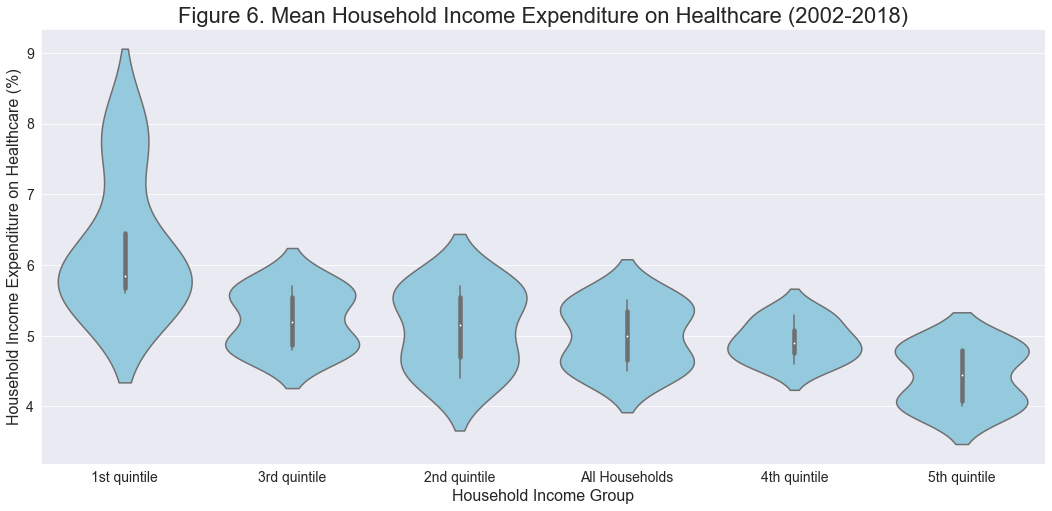

In [29]:
# 1. Violinplot of mean household income expenditure on healthcare per quintile.
# Setting main figure layout and title for graph
plt.title('Figure 6. Mean Household Income Expenditure on Healthcare (2002-2018)', fontsize=22)

HealthSpendingViolinplot_plot = HouseHoldSpending.sort_values('percentage_expenditure_on_healthcare', ascending=False).copy()

# Setting x and y value, and selecting data from data source
sns.violinplot( x ='income_quintile', y = 'percentage_expenditure_on_healthcare', data=HealthSpendingViolinplot_plot, color='skyblue', scale='count')
# Setting labels, title and legends
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Household Income Group', fontsize=16)
plt.ylabel('Household Income Expenditure on Healthcare (%)', fontsize=16)

plt.show()

**2.3.2.4. Analysis, Results and Discussion (Figure 6)**
- There are no outlier data point for any quintile group.
- The value of all households expenditure on healthcare is not the mean percentages of 1st to 5th quintile group.
- Household in 1st quintile group spend the highest percentage of their income on healthcare compared to other quintile groups.
- Some household in the 1st quintile group spend as little as 5.6% of their income on healthcare, while others spend up to 7.8% of their income.
- The median of 2nd and 3rd quintile group spend approximately the same percentage of their income on healthcare. 
- The difference between 2nd and 3rd quintile group is that 2nd quintile group has a larger deviation in income expenditure on healthcare.
- The 5th quintile group spends the least percentage of their income on healthcare expenditure.
- Households within the 4th quintile group has a similar spending pattern, majority of the household spends approximately 4.9% of their income on healthcare.

In summary, although 1st quintile group spent the largest percentage of their income on healthcare, the top spender on healthcare belonged to 5th quintile. The logic behind that is that 5th quintile group have a higher income margin compared to 1st quintile group, and 4% of what the income was can be much larger than 5.6% of income earned by people in 1st quintile group.

0.2212657013181294


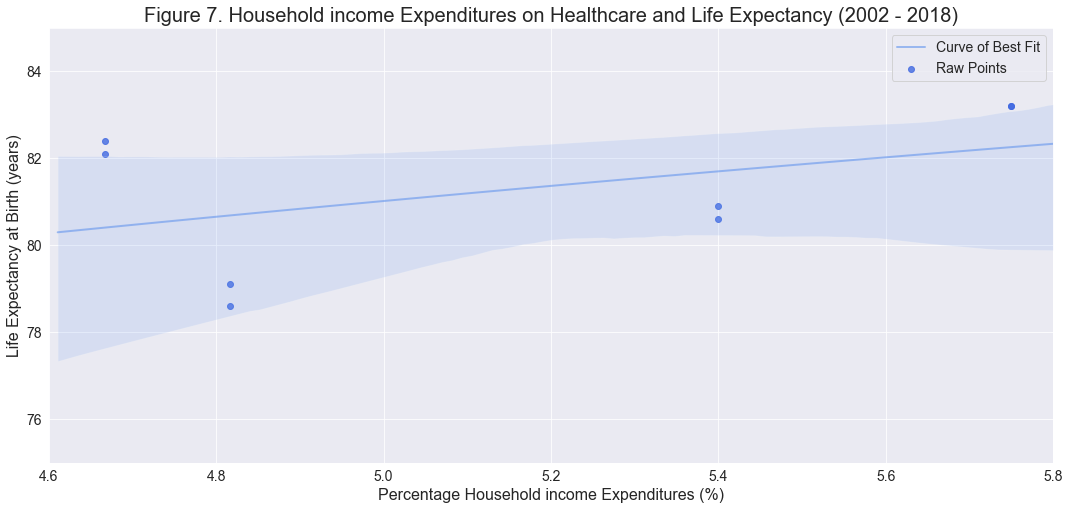

In [30]:
# 2. Scatter plot life Expectancy against household income expenditure on healthcare.

# Defining X and Y
# GDP Per Capita is plotted on x-axis
x = HealthLifeExpectancy['percentage_expenditure_on_healthcare']

# Life expectancy at birth will be plotted on y-axis
y = HealthLifeExpectancy['value_LifeExpectancy']

# Setting the title
plt.title('Figure 7. Household income Expenditures on Healthcare and Life Expectancy (2002 - 2018)', fontsize=20)

# Using the fuction regplot to make a scatterplot
# A curved line of best fit has been drawn using logx=True
ax = sns.regplot(x, y, logx=True, 
                scatter_kws={"color": "royalblue"}, line_kws={"color": "cornflowerblue", "alpha":0.6, 'lw':2})

# Setting lables, legends and ticks
plt.xlabel('Percentage Household income Expenditures (%)', fontsize=16)
plt.ylabel('Life Expectancy at Birth (years)', fontsize=16)
plt.axis([4.6, 5.8,75, 85 ])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Curve of Best Fit','Raw Points'], fontsize=14)

def r_square():
    denominator = x.dot(x) - x.mean() * x.sum()

    m = (x.dot(y) - y.mean()*x.sum())/denominator
    b = (y.mean()*x.dot(x)-x.mean()*x.dot(y))/denominator
    y_pred = m*x + b

    res = y - y_pred
    tot = y - y.mean()

    R_squared = 1 - res.dot(res) / tot.dot(tot)
    print (R_squared)
    
    # Code taken from https://medium.com/@mjfstanford/simple-linear-regression-in-python-905b759ef0e6 
    
r_square() # R-square = 0.221265

plt.show()

**2.3.2.5. Analysis, Results and Discussion (Figure 7)**
- Percentage household income expenditure on healthcare and life expectancy has an r-square value of 0.22.
- The correlation between household income expenditure on health care and life expectancy is weak positive.
- There are very few recorded data for household income expenditure on healthcare.

One of the most important contributing factor in increasing life expectancy is healthcare. Here an analysis of the link between household income expenditure on healthcare and life expectancy was conducted between the year 2002 to 2018. The visualization in Figure 7 shows that as household income expenditure increases, life expectancy increases. However, the correlation shown was a weak positive correlation. This suggests that by 2002, the percentage of household income expenditure on healthcare may have little effect on life expectancy in Singapore. By 2002, Singapore was a developed nation with an aging population, hence, spending more on healthcare may have little effect on life expectancy. This is in-line with Obrizan and Wehby (2018), who theorize that increasing health spending in countries that have a low life expectancy would bring a larger marginal return compared to increasing longevity in a country with high life expectancy.

However, the result in Figure 7 might not be as reliable due to insufficient data. More data on household income expenditure on healthcare should be obtained to generate a better result.

### 2.4. Effects of demographic transition on economy
Lastly, we will evaluate the effects of demographic transition on Singapore's economy. We will split this section into two segment, 1) the effect of increase in elderly population on nation productivity, and 2) the evaluation of correlation of life expectancy, elderly population, GDP Per Capita, household income expenditure on healthcare and the productivity of Singapore.

**2.4.1. Elderly population and nation productivity**

Data Selection: The analysis of elderly population's effect on the nation productivity will be done using will be done using the datasets from ElderlyPopulation (Section 2.2.2.) and DataComplete[['level_1_Productivity','value_Productivity']]. In addition, we will also analyze the percentage of change in elderly population against percentage change in productivity.

Data description: Value added per worker, expressed in chained (2015) dollars. Value added refers to the aggregate value of goods and services produced in the economic territory of Singapore. Worker refers to the number of persons in employment. Estimates are compiled based on the best available data at the time of release. They may be subsequently revised when new data becomes available.

In [31]:
# Storing DataComplete[['level_1_Productivity','value_Productivity']] into a new dataframe called Productivity
Productivity = DataComplete[['level_1_Productivity','value_Productivity']]

# Checking for duplicated data
Productivity.duplicated().sum()

# Checking for nulls
Productivity.isnull().sum()
# There are a total of 120083 rows of dupicated data
# There are a total of 19800 nan in value_Demographic column

level_1_Productivity    19800
value_Productivity      19800
dtype: int64

**2.4.1.1. Data Wrangling and Exploratory Data Analysis**

Before the visualization of demographic data can be done, data wrangling on Productivity dataframe must be done. These are the steps that will be taken on dataset:

1. Removal of duplicated data
- Removal of rows with missing data
- Data reshaping of Productivity and ElderlyPopulation
- Calculating change in productivity.

In [32]:
# 1. Removing duplicated data rows
Productivity = Productivity.drop_duplicates(keep='first')

# 2. Remove NaN from dataset (removing error in data arising from initial data wrangling in section 2.1.)
Productivity = Productivity.dropna()
Productivity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1983 to 2018
Data columns (total 2 columns):
level_1_Productivity    36 non-null object
value_Productivity      36 non-null float64
dtypes: float64(1), object(1)
memory usage: 864.0+ bytes


In [33]:
# 3. Data reshaping of Productivity and ElderlyPopulation
# Firstly, remove 'Percentage_(Elderly/TotalPopulation)' from ElderlyPopulation dataframe and store value in ElderlyProductivityTemp
ElderlyProductivityTemp = ElderlyPopulation.drop(columns={'Percentage_(Elderly/TotalPopulation)'})

# Then, we perform inner merge of Productivity and ElderlyProductivity
# We will store the new dataframe in ProductElderly
# This step will remove all irrelevant data not in the intersection of Productivity and ElderlyProductivity dataset
ProductElderly = pd.merge(Productivity, ElderlyProductivityTemp, left_on='year', right_index=True, how='inner')

# Lastly, we will remove level_1_Productivity column as it is not relevant to data visualization
ProductElderly = ProductElderly.drop(columns={'level_1_Productivity'})
ProductElderly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1983 to 2018
Data columns (total 2 columns):
value_Productivity    36 non-null float64
Elderly_Population    36 non-null float64
dtypes: float64(2)
memory usage: 864.0 bytes


In [34]:
# 4. Calculating growth rate in productivity using pct_change method
ChangePct = ProductElderly.drop(columns={'Elderly_Population'})
ChangePct['value_Productivity'] = ProductElderly['value_Productivity'].pct_change()*100
ChangePct = ChangePct.rename(columns={'value_Productivity':'Change_Productivity'})
ChangePct.head()
# The value above, which has been calculated is the same as the one provided by data.gov.sg

# Next we calculating growth rate productivity using pct_change method from ElderlyPopulation dataset
ChangeElderly = ElderlyPopulation.drop(columns={'Percentage_(Elderly/TotalPopulation)'}).pct_change()*100
ChangeElderly = ChangeElderly.rename(columns={'Elderly_Population':'Change_Elderly'})

# Lastly, we perform inner merge of ChangePct and ChangeElderly
# We will store the new dataframe in ChangePctElderly
# This step will remove all irrelevant data not in the intersection of ChangePct and ChangeElderly dataset
ChangePctElderly = pd.merge(ChangePct, ChangeElderly, left_on='year', right_index=True, how='inner').dropna()
ChangePctElderly.head(2)

,Change_Productivity,Change_Elderly
year,,
1984,7.42,3.82
1985,4.42,4.17


**2.4.1.2. Visualization and Analysis**
1. Subplotting of elderly in Singapore population and national productivity (1983-2018)

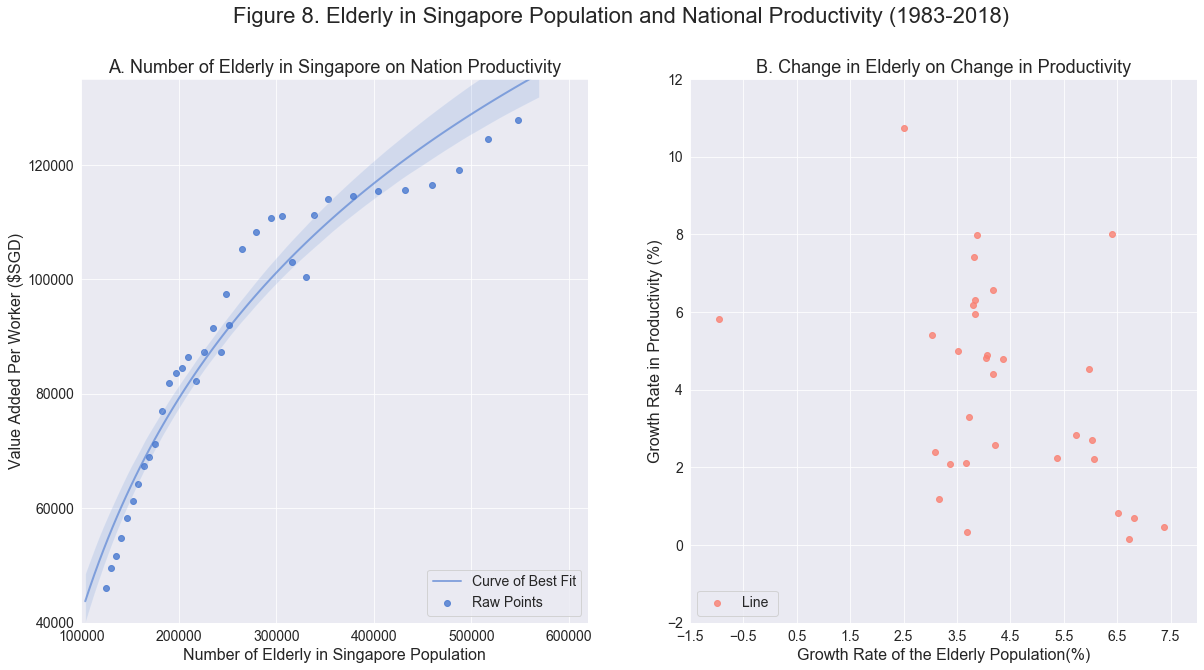

In [35]:
# Subplotting of Elderly in Singapore Population and National Productivity (1983-2018)
sns.set_palette("muted")

fig = plt.figure(figsize=(20,10))

# Plotting Figure 1 containing Life Expectancy At Birth
fig.suptitle('Figure 8. Elderly in Singapore Population and National Productivity (1983-2018)', fontsize=22)

ax1 = fig.add_subplot(121)

# Using the fuction regplot to make a scatterplot
# A curved line of best fit has been drawn using logx=True
ax = sns.regplot(x = ProductElderly['Elderly_Population'], y = ProductElderly['value_Productivity'], logx=True, 
                scatter_kws={}, line_kws={ "alpha":0.6, 'lw':2}, ax=ax1)
ax.set_title('A. Number of Elderly in Singapore on Nation Productivity', fontsize=18)
# Setting lables, legends and ticks
plt.xlabel('Number of Elderly in Singapore Population', fontsize=16)
plt.ylabel('Value Added Per Worker ($SGD)', fontsize=16)
plt.axis([100000, 620000,40000, 135000])
plt.xticks(np.arange(100000,620000, 100000), fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Curve of Best Fit','Raw Points'], fontsize=14, loc='lower right')

# Plotting Figure 2 containing Life Expectancy At Age 65 Years
ax2 = fig.add_subplot(122)
# Using the fuction regplot to make a scatterplot
# A curved line of best fit has been drawn using logx=True
ax = sns.regplot(x = ChangePctElderly['Change_Elderly'], y = ChangePctElderly['Change_Productivity'], 
                scatter_kws={"color": "salmon"}, line_kws={"color": "salmon", "alpha":0.6, 'lw':2}, ax=ax2, fit_reg=False)
ax.set_title('B. Change in Elderly on Change in Productivity', fontsize=18)
# Setting lables, legends and ticks
plt.xlabel('Growth Rate of the Elderly Population(%)', fontsize=16)
plt.ylabel('Growth Rate in Productivity (%)', fontsize=16)
plt.yticks(fontsize=14)
plt.axis([-1.5, 8, -2,12])

plt.xticks(np.arange(-1.5,8, 1), fontsize=14)
plt.legend(['Line ','Raw Points'], fontsize=14, loc='lower left')

plt.show()

**2.4.1.3. Analysis, Results and Discussion**

- As the number of elderly increases, the total value added per worker (productivity) also increased (Figure 8.A).
- A steep increase in productivity can be seen as elderly population reaches approximately 500,000 in number, there was a growth of 4.53% in productivity. 
- As elderly in population increased, productivity growth rate decreased (Figure 8.A).
- A similar effect can be seen in Figure 8(B), which showed that as the growth rate increases, productivity growth rate decreases.
- The relationship between the number of elderly in Singapore and productivity is non-linear (Figure 8.A), this suggested that there are other determinants affecting productivity.
- The growth rate in the elderly population that optimizes the best growth rate in productivity seems to be around 3.5-4.5%.
- There is one outliers in Figure 8(B) at coordinate (-1, 5.9). 

An aging population is a concern shared by many countries around world, that in the absence of offsets from another source, the labour force proportion of the population may not be able to maintain the economy output per capita (Denton and Spencer, 2019). The result of this study shows that as although growth rate of elderly population has a negative correlation to the growth rate in productivity (Figure 8.B), productivity will continue to grow (Figure 8.A), albeit at a slower rate. 

The number of elderly in a population is not the main determinant for productivity. In Singapore, the labour age limit is 67 years old. Hence, it is interesting to note that in 2014, within this age group, there were 54.1% and 29.5% of employed male and female elderly workers (Department of Statistics Singapore, 2017).

**2.4.2. Were there any correlation between life expectancy, elderly population, GDP Per Capita and the productivity of Singapore?**

Data Selection: For the final analysis, we evaluated the correlation between life expectancy, elderly population, GDP Per Capita and the productivity of Singapore. Household income expenditure on healthcare is not used as there are far too little data recorded. The data used are LifeExpectancyBirth, ElderlyPopulation, GDPPerCapita and Productivity datasets which have been obtained from previous sections.  

**2.4.2.1 Data Wrangling and Exploratory Data Analysis**

1. Removal of irrelevant information such as data title.
2. Merging of LifeExpectancyBirth, ElderlyPopulation, GDPPerCapita and Productivity datasets.
3. Calculate the rate of change for each data.

In [36]:
# 1. Removal of irrelevant information
# Working with LifeExpectancyBirth dataset
# Set year as index, creating new dataframe to store ammended data
# Remove Total_Life_Expectancy and RateOfChangeLifeExpectancyBirth(%) column and store amended data in temporary dataframe
TempFinalLife = LifeExpectancyBirth.drop(columns={'Total_Life_Expectancy','RateOfChangeLifeExpectancyBirth(%)'}).set_index('year')

TempFinal65 = LifeExpectancy65Years.drop(columns={'Total_Life_Expectancy','RateOfChangeLifeExpectancy65Years(%)'}).set_index('year')
TempFinal65.rename(columns={'value_LifeExpectancy':'value_LifeExpectancy65'},inplace=True)

# Elderly Population Dataset
# Remove Percentage_(Elderly/TotalPopulation) column and store amended data in temporary dataframe
TempFinalElderly = ElderlyPopulation.drop(columns={'Percentage_(Elderly/TotalPopulation)'})

# GDPPerCapita Dataset
# Remove level_1_GDPPerCapita column and store amended data in temporary dataframe and store amended data in temporary dataframe
TempFinalGDPCapita = GDPPerCapita.drop(columns={'level_1_GDPPerCapita'})

# Productivity Dataset
# Remove level_1_Productivity column and store amended data in temporary dataframe
TempFinalProduct = Productivity.drop(columns={'level_1_Productivity'})

In [37]:
# 2. Merging of LifeExpectancyBirth, ElderlyPopulation, GDPPerCapita and Productivity datasets.
# The merging will be perform step wise
FinalDataset = pd.merge(TempFinalLife, TempFinalElderly, left_on='year', right_index=True, how='inner')
# Adding LifeExpectancy at age 65 years
FinalDataset = pd.merge(FinalDataset, TempFinal65, left_on='year', right_index=True, how='inner')
# Merging TempFinalGDPCapita
FinalDataset = pd.merge(FinalDataset, TempFinalGDPCapita,left_on='year', right_index=True, how='inner')
# Merging TemFinalProduct
FinalDataset = pd.merge(FinalDataset, TempFinalProduct, left_on='year', right_index=True, how='inner')
FinalDataset.head(2)

,value_LifeExpectancy,Elderly_Population,value_LifeExpectancy65,value_GDPPerCapita,value_Productivity
year,,,,,
1983,73.00,"125,428.00",14.40,"14,195.00","46,103.84"
1984,73.30,"130,222.00",14.60,"15,274.00","49,525.69"


In [38]:
# 3. Calculating the growth rate (rate of change) for all data
GrowthData = FinalDataset.pct_change()*100
GrowthData = GrowthData.dropna()

**2.4.2.2. Visualization and Analysis**

1. Half correlation matrix heatmap plot of FinalDataset and Growth rate of GrowthData dataset.

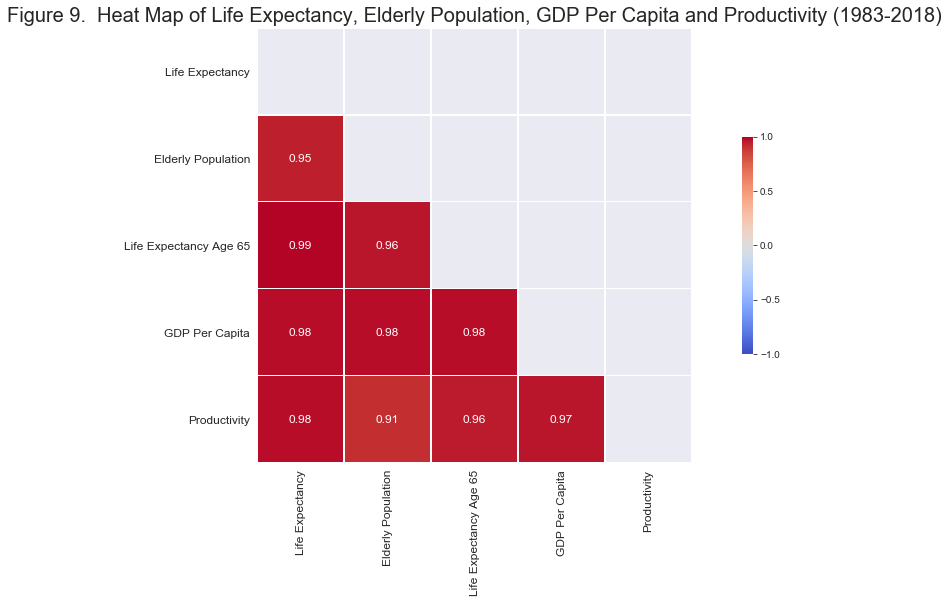

In [39]:
# 1. Half Correlation matrix heatmap plot

# Plotting heat map of FinalDataset
ax = plt.subplots(figsize=(18, 8))

# Calculate correlation between each pair of variable
corr_matrix = FinalDataset.corr()

# plotting half matrix heatmap
# np.zeros_like returns 0 with the same shape and type as the give array
# dtype=np.bool change arrays = boolean
# np.triu_indices_from(mask) returns the indices for the upper triangle of the array.
mask = np.zeros_like(corr_matrix, dtype=np.bool)

# Set upper right triangle = True
# When heatmap plots, it plots as an empty cell
mask[np.triu_indices_from(mask)]= True

ax = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': 0.5,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
# Set lebels and title
ax.set_yticklabels(['Life Expectancy','Elderly Population', 'Life Expectancy Age 65','GDP Per Capita', 'Productivity'], rotation = 0, fontsize=12)
ax.set_xticklabels(['Life Expectancy','Elderly Population','Life Expectancy Age 65' ,'GDP Per Capita', 'Productivity'], rotation = 90, fontsize=12)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
ax.set_title('Figure 9.  Heat Map of Life Expectancy, Elderly Population, GDP Per Capita and Productivity (1983-2018)', size=20)
# Code taken from https://www.kdnuggets.com/2019/07/annotated-heatmaps-correlation-matrix.html

plt.show()

**2.3.4. Analysis, Results, and Discussion**
- The correlation between life expectancy to the elderly population, life expectancy at age 65, GDP per capita and productivity are 0.95, 0.99, 0.98 and 0.98 respectively.
- The correlation between the elderly population to life expectancy, life expectancy at age 65 , GDP per capita and productivity are 0.95, 0.96, 0.98 and 0.91 respectively.
- The correlation between life expectancy at age 65 to life expectancy, elderly population, GDP per capita and productivity are 0.99, 0.96, 0.98 and 0.96 respectively.
- The correlation between GDP per capita to life expectancy, elderly population, life expectancy at age 65 and productivity are 0.98, 0.98, 0.98 and 0.97 respectively.

From 1983 to 2018, Figure 9 showed that there was a strong positive correlation between life expectancy, life expectancy at age 65 years,elderly population, GDP per capita and productivity. The lowest correlation coefficient in Figure 9 was 0.91 and the highest correlation coefficient was 0.99. This analysis had not taken other determinates and time factor into account. Life expectancy, life expectancy at age 65 years,elderly population, GDP per capita and productivity had been on the rise since 1983, hence, if there was any negative correlation towards 2018, the result will not be reflected on this matrix. To better understand the relationship between these variables, the yearly growth rate for each variable should be analyzed instead.

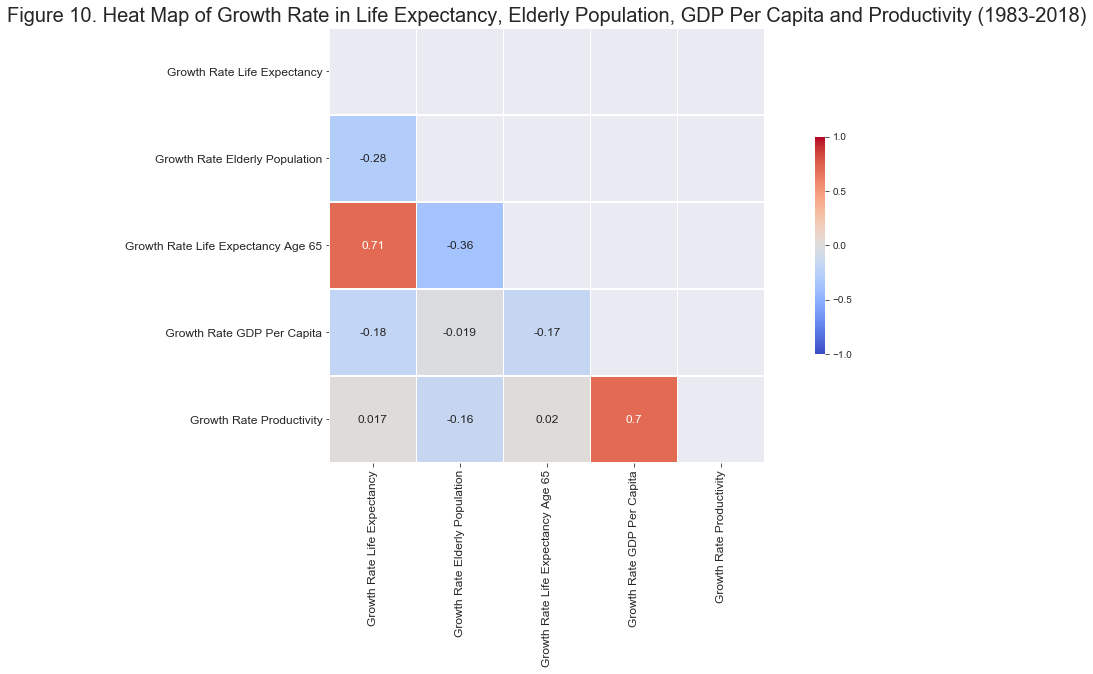

In [40]:
ax1 = plt.subplots(figsize=(18, 8))

# Calculate correlation between each pair of variable
corr_matrix1 = GrowthData.corr()

# plotting half matrix heatmap
# np.zeros_like returns 0 with the same shape and type as the give array
# dtype=np.bool change arrays = boolean
# np.triu_indices_from(mask) returns the indices for the upper triangle of the array.
mask = np.zeros_like(corr_matrix1, dtype=np.bool)

# Set upper right triangle = True
# When heatmap plots, it plots as an empty cell
mask[np.triu_indices_from(mask)]= True

ax1 = sns.heatmap(corr_matrix1,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .5,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
# Set lebels and title
ax1.set_yticklabels(['Growth Rate Life Expectancy','Growth Rate Elderly Population', 'Growth Rate Life Expectancy Age 65',' Growth Rate GDP Per Capita', 'Growth Rate Productivity'], rotation = 0, fontsize=12)
ax1.set_xticklabels(['Growth Rate Life Expectancy','Growth Rate Elderly Population', 'Growth Rate Life Expectancy Age 65','Growth Rate GDP Per Capita', 'Growth Rate Productivity'], rotation = 90, fontsize=12)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
ax1.set_title('Figure 10. Heat Map of Growth Rate in Life Expectancy, Elderly Population, GDP Per Capita and Productivity (1983-2018)', size=20)
# Code taken from https://www.kdnuggets.com/2019/07/annotated-heatmaps-correlation-matrix.html

plt.show()

**2.3.5.  Analysis, Results, and Discussion**
- There is a negative correlation between growth in life expectancy and elderly population, and GDP per capita (Figure 10). 
- There is no correlation between growth in life expectancy and growth in productivity.
- There is a strong correlation between the growth in life expectancy and life expectancy at age 65 years.
- There is a negative correlation between the growth in life expectation at age 65 and the growth in elderly population.
- A negative correlation between growth in elderly population and productivity can be seen. While no correlation can be seen between growth in elderly population and GDP per capita.
- There is a high positive correlation between growth in productivity and GDP per capita.

There was a strong correlation between the growth in life expectancy ar birth and life expectancy at age 65, this can be seen in Figure 1 as both expectancies increased drastically between 1983 and 2018.

It was interesting to note that there was a negative correlation between the growth in the elderly population and the growth in life expectancy at birth and at age 65 years. This did not mean that there will be a reduction in the value of the decreasing variable, it meant that the growth rate will decrease. From looking at the trend of life expectancy (Figure 1) and elderly population (Figure 4), in 2018, the elderly population rate was growing at 13.72% while life expectancy had no growth. Hence, the higher growth in elderly rate, the lower the growth in life expectancy, however, this correlation only reflected the inability of human to age past a certain point. 

The growth in life expectancy at birth and at age 65 years reduces growth in GDP per capita, and, had no correlation with productivity. The higher the growth rate of life expectancy (at birth or at 65 years), the longer people will tend to live. And when more people fall into the dependency age group compared to labour working-age, GDP per capita will decrease.

The relationship between growth rate of GDP per capita and life expectancy weakens after reaching a certain point. This was in agreement with Figure 5 and was supported by Biciunaite (2014) who stated that for developed nations, when GDP per capita exceeds US$40,000, the relationship between GDP per capita and life expectancy becomes inverse. Similarly, as the growth rate in elderly population increases, the growth rate in productivity decreases. 

There was a strong relationship between growth in productivity and growth rate of its GDP per capita. This meant that if the productivity of the average worker rises, there will be an increase in GDP per capita.

## 3. Conclusion
Key findings:
1. The growth in life expectancy at birth is slowing down.
2. Life expectancy at age 65, continues to grow, however, the growth rate will soon decrease.
3. The growth in life expectancy will decrease and will reach a maximum of 85-90 years by 2040. 
4. For life expectancy to get past 90 years, a fundamental change in our ability to delay aging process must be made.
5. Singapore demographic shifted into aging population between the years 1999-2000 when it past the 7% elderly population mark.
6. In 2018, 13.72% of Singapore population was made up of the elderly.
7. Elderly numbers increased by 1360.94% from 37,500 in 1960 to 547,854 in 2018.
8. There is a positive correlation between GDP per capita and life expectancy.
9. Life expectancy in Singapore increased the most when its GDP per capita increased from \$1,310 to \$10,717
10. From 1960 to 1980, there was a total increase of 9.2 years in life expectancy, which consisted of 45% in the total increment of life expectancy.
11. Life expectancy growth rate decreased after GDP per capita reach \$10,717.
12. The increase of life expectancy is not only attributed to GDP per capita, other factors that can affect life expectancy are technological progress in public health interventions, hygiene measures, oral hydration therapy, access to healthcare resources and food supply.
13. The correlation between household income expenditure on health care and life expectancy was weak positive.
14. The more number of elderly in population, the growth rate in productivity seems to be slowing down.
15. When the growth rate for elderly was high, growth rate in productivity was decreases.
16. The optimization growth rate of both the elderly population and productivity seems to be between 3.5-4.5%.
17. The growth rate in elderly population and productivity had a weak negative correlation, this meant that when growth rate of elderly population was high, productivity will continue to grow, albeit at a slower rate.
18. Aging population does not affect much of Singapore's productivity, this was because in Singapore, the elderly population are encouraged to work.
19. 54.1% and 29.5% male and female elderly between the ages 65-69 were employed in 2014.
20. Singapore has one of the highest old-age employment rates and Singapore government offers grants to incentivise the creation of elderly-friendly work processes and workplace design (Rogerson and Stacey, 2018).

In summary, Singapore has a ignorable negative correlation of -0.019 between the growth rate of the elderly population and the growth rate of GDP per capita. The economy of Singapore will continue to grow even when the number of elderly raises. This can seen in Figure 9 and is attributed to the fact that Singapore has one of the highest old-age employment rates. Singapore government has has been tackling the challenges of aging through national public policy as well as regional initiatives, backed by state, charity and private funding (Rogerson and Stacey, 2018). This creates an environment for which the elderly can contribute to the economy while aging healthily.

## 4. References

- Adamis, D., Devaney, A., Shanahan, E., Mccarthy, G. & Meagher, D. 2014. Defining ‘recovery’ for delirium research: a systematic review. Age and Ageing, 44, 318-321.
- Biciunaite. 2014. Economic Growth and Life Expectancy – Do Wealthier Countries Live Longer? [Online]. Euromonitor International. Available: https://blog.euromonitor.com/economic-growth-and-life-expectancy-do-wealthier-countries-live-longer/ [Accessed 25 Feb 2020].
- Brown, G. C. 2015. Living too long: the current focus of medical research on increasing the quantity, rather than the quality, of life is damaging our health and harming the economy. EMBO reports, 16, 137-141.
Cervellati, M. & Sunde, U. 2011. Life expectancy and economic growth: the role of the demographic transition. Journal of Economic Growth, 16, 99-133.
- Chan, M. F. & Kamala Devi, M. 2012. Factors Affecting Life Expectancy: Evidence From 1980-2009 Data in Singapore, Malaysia, and Thailand. Asia Pacific Journal of Public Health, 27, 136-146.
- Crimmins, E. M. 2015. Lifespan and Healthspan: Past, Present, and Promise. The Gerontologist, 55, 901-911.
- Denton, F. & Spencer, B. 2019. Effects of Population Aging on Gross Domestic Product per Capita in the Canadian Provinces: Could Productivity Growth Provide an Offset? Canadian Public Policy, 45, 1-16.
- Department of Statistics Singapore. 2017. Age-Sex Specific Resident Labour Force Participation Rate [Online]. Available: https://data.gov.sg/dataset/age-sex-specific-resident-labour-force-participation-rate [Accessed 21 Feb 2020].
- Department of Statistics Singapore. 2019. M810091 - Births And Fertility Rates, Annual [Online]. Singstat.gov: Singapore Government. Available: https://www.tablebuilder.singstat.gov.sg/publicfacing/createDataTable.action?refId=13273 [Accessed 21 Feb 2020].
- Lim, R. B. T., Zheng, H., Yang, Q., Cook, A. R., Chia, K. S. & Lim, W. Y. 2013. Ethnic and gender specific life expectancies of the Singapore population, 1965 to 2009 – converging, or diverging? BMC Public Health, 13, 1012.
- Lutz, W. & Kebede, E. 2018. Education and Health: Redrawing the Preston Curve. Population and development review, 44, 343-361.
- Obrizan, M. & Wehby, G. L. 2018. Health Expenditures and Global Inequalities in Longevity. World Development, 101, 28-36.
- Preston, S. H. 2007. The changing relation between mortality and level of economic development. International Journal of Epidemiology, 36, 484-490.
- Rogerson, A. & Stacey, S. 2018. Successful Ageing in Singapore. Geriatrics (Basel, Switzerland), 3, 81.
- United Nations. 2019. Aging [Online]. United Nation. Available: https://www.un.org/en/sections/issues-depth/ageing/ [Accessed 17 Feb 2020].

